<a href="https://colab.research.google.com/github/samcast1/Short-Term-Investments-Model/blob/main/notebooks/4.2_sc_concatenating_reviews_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective: concatenate all city reviews into a single df and explore basic trends.

In [1]:
import pandas as pd

In [3]:
cities = pd.read_csv('city_list.csv')['0'].tolist()

In [4]:
reviews = [f"reviews/{city}_reviews_clean.csv" for city in cities]

In [ ]:
# Initialize an empty DataFrame to store all reviews
all_reviews_df = pd.DataFrame()

  # Iterate over each city's reviews and concatenate them into one DataFrame
for city, file_path in zip(cities, reviews):
  try:
    print(f"Processing city: {city}")

    # Read the CSV file
    reviews_df = pd.read_csv(file_path)

    # Add a column for the city
    reviews_df['city'] = city

    # Append to the all_reviews_df DataFrame
    all_reviews_df = pd.concat([all_reviews_df, reviews_df], ignore_index=True)
  except Exception as e:
      print(f"This city is probably missing . . . : {e}")

# Print the shape of the concatenated DataFrame
print(f"Total reviews collected: {all_reviews_df.shape[0]}")

Processing city: newyork-ny
Processing city: losangeles-ca
Processing city: chicago-il
This city is probably missing . . . : [Errno 2] No such file or directory: 'reviews/chicago-il_reviews_clean.csv'
Processing city: dallas-tx
Processing city: houston-tx
Processing city: washington-dc
Processing city: philadelphia-pa
Processing city: miami-fl
Processing city: atlanta-ga
Processing city: boston-ma
Processing city: phoenix-az
Processing city: sanfrancisco-ca
Processing city: riverside-ca
Processing city: detroit-mi
Processing city: seattle-wa
Processing city: minneapolis-mn
Processing city: sandiego-ca
Processing city: tampa-fl
Processing city: denver-co
Processing city: baltimore-md
Processing city: st.louis-mo
Processing city: orlando-fl
Processing city: charlotte-nc
Processing city: sanantonio-tx
Processing city: portland-or
Processing city: sacramento-ca
Processing city: pittsburgh-pa
Processing city: cincinnati-oh
Processing city: austin-tx
Processing city: lasvegas-nv
Processing c

In [ ]:
all_reviews_df.head()

,date,rating,note,review_text,city
0,2024-06-01,5.0,Stayed with kids,awesome stay!,newyork-ny
1,2024-06-01,5.0,Stayed a few nights,Great location close to the Empire State Build...,newyork-ny
2,2024-04-01,5.0,Stayed a few nights,Excellent apartment. Location level can hardly...,newyork-ny
3,2024-04-01,5.0,Stayed one night,The staffs are friendly and the location is pe...,newyork-ny
4,2024-04-01,5.0,Group trip,We were lucky enough to have Henri as our host...,newyork-ny


In [ ]:
all_reviews_df.to_csv('all_reviews.csv', index=False)

In [5]:
all_reviews_df = pd.read_csv('all_reviews.csv')

In [6]:
all_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895580 entries, 0 to 895579
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         894850 non-null  object 
 1   rating       894850 non-null  float64
 2   note         894815 non-null  object 
 3   review_text  895431 non-null  object 
 4   city         895580 non-null  object 
dtypes: float64(1), object(4)
memory usage: 34.2+ MB


In [7]:
df = all_reviews_df.copy()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

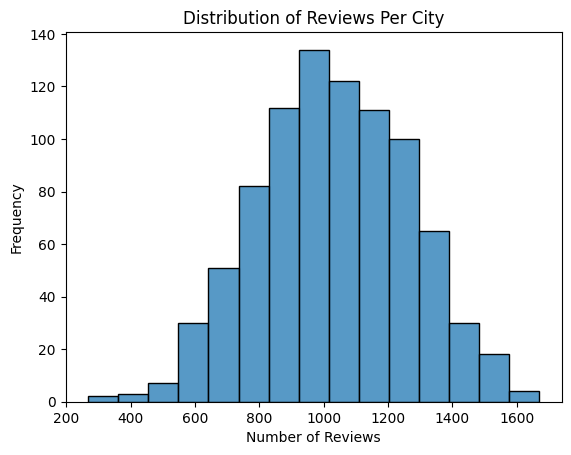

In [142]:
city_counts = df.groupby(df['city']).size().sort_values(ascending=False)
sns.histplot(city_counts, bins=15)
plt.title('Distribution of Reviews Per City')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

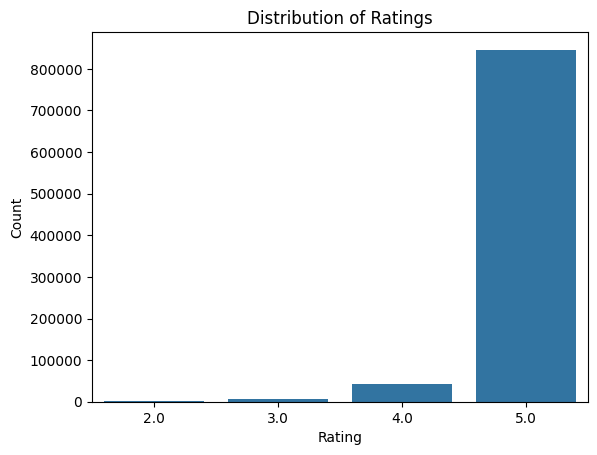

In [14]:
ratings = df.rating.value_counts()
sns.barplot(x=ratings.index, y=ratings.values)
plt.title(f"Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

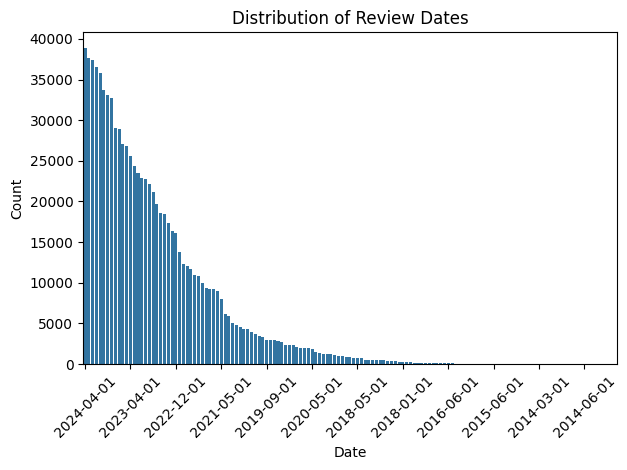

In [56]:
date = df.date.value_counts()

ax = sns.barplot(x=date.index, y=date.values)

ticks = ax.get_xticks()
selected_ticks = ticks[::12]
ax.set_xticks(selected_ticks)

plt.xticks(rotation=45)

plt.title("Distribution of Review Dates")
plt.xlabel("Date")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

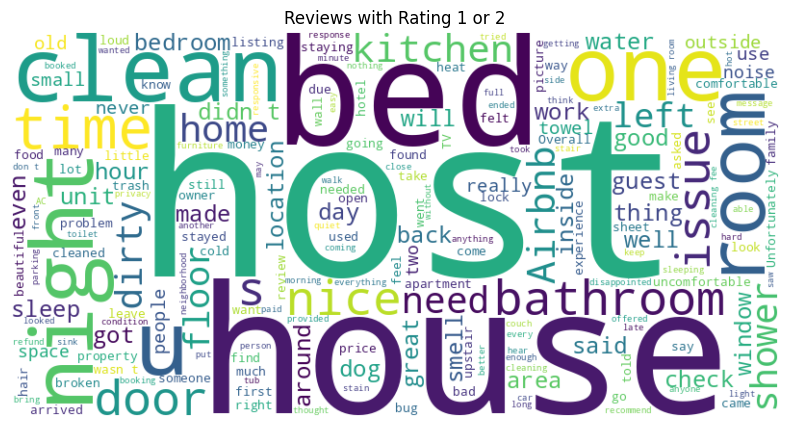

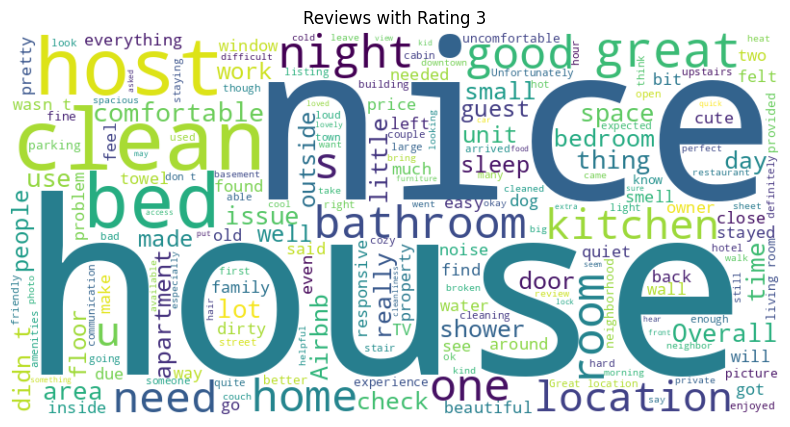

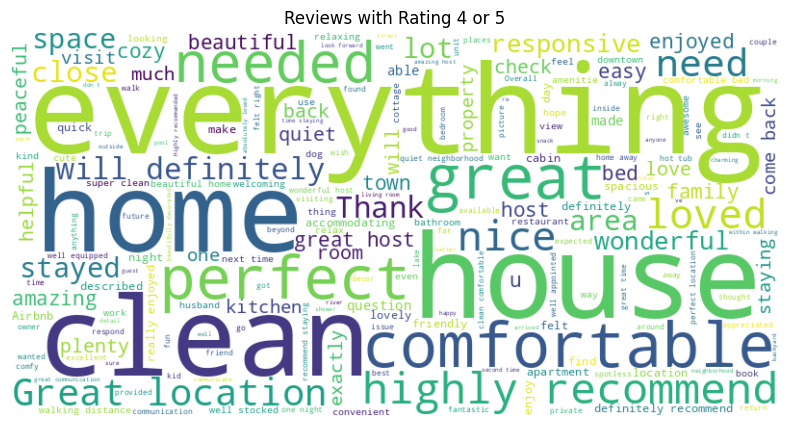

In [21]:
from wordcloud import WordCloud, STOPWORDS

reviews_rating_2 = df[df['rating'].isin([1.0,2.0])]['review_text'].str.cat(sep=' ')
reviews_rating_3 = df[df['rating'] == 3.0]['review_text'].str.cat(sep=' ')
reviews_rating_4_5 = df[df['rating'].isin([4.0, 5.0])]['review_text'].str.cat(sep=' ')

additional_stopwords = set(['stay', 'place'])

def generate_wordcloud(text, title):
    stopwords = STOPWORDS.union(additional_stopwords)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(reviews_rating_2, 'Reviews with Rating 1 or 2')
generate_wordcloud(reviews_rating_3, 'Reviews with Rating 3')
generate_wordcloud(reviews_rating_4_5, 'Reviews with Rating 4 or 5')

In [22]:
df.groupby('city')['rating'].mean().sort_values(ascending=False)

city
asheville-nc          4.985507
jeffersoncity-mo      4.982827
arkadelphia-ar        4.982578
greenwood-sc          4.982328
freeport-il           4.981974
                        ...   
eaststroudsburg-pa    4.836364
pittsburgh-pa         4.835893
northplatte-ne        4.823404
norwalk-oh            4.811009
fernley-nv            4.794805
Name: rating, Length: 871, dtype: float64

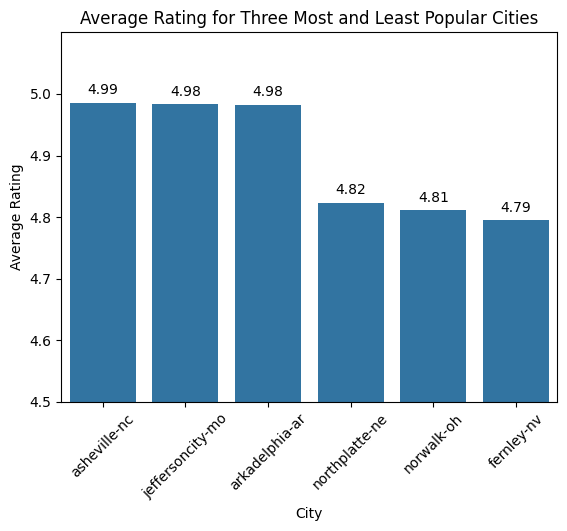

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_cities = df.groupby('city')['rating'].mean().sort_values(ascending=False)
top_3_cities = sorted_cities.head(3)
bottom_3_cities = sorted_cities.tail(3)

combined_cities = pd.concat([top_3_cities, bottom_3_cities])

ax = sns.barplot(
    x=combined_cities.index,
    y=combined_cities.values
)

plt.ylim(4.5, 5.1)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')


ticks = ax.get_yticks()
ax.set_yticks(ticks[:-1])
ax.set_yticklabels([f'{tick:.1f}' for tick in ticks[:-1]])

plt.title("Average Rating for Three Most and Least Popular Cities")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)

plt.show()

In [57]:
df.note.value_counts()

note
Stayed a few nights    412339
Stayed one night       202412
Stayed with kids       122253
Group trip              58309
Stayed with a pet       56924
Stayed about a week     24613
Stayed over a week      17965
Name: count, dtype: int64

In [72]:
df.groupby('note')['rating'].value_counts() / df.groupby('note')['rating'].count()

note                 rating
Group trip           5.0       0.945806
                     4.0       0.047746
                     3.0       0.005437
                     2.0       0.001012
Stayed a few nights  5.0       0.946243
                     4.0       0.047337
                     3.0       0.005500
                     2.0       0.000919
Stayed about a week  5.0       0.947142
                     4.0       0.045992
                     3.0       0.006013
                     2.0       0.000853
Stayed one night     5.0       0.946505
                     4.0       0.045931
                     3.0       0.006507
                     2.0       0.001057
Stayed over a week   5.0       0.945839
                     4.0       0.046312
                     3.0       0.006513
                     2.0       0.001336
Stayed with a pet    5.0       0.942731
                     4.0       0.049786
                     3.0       0.006394
                     2.0       0.001089
Stayed with 

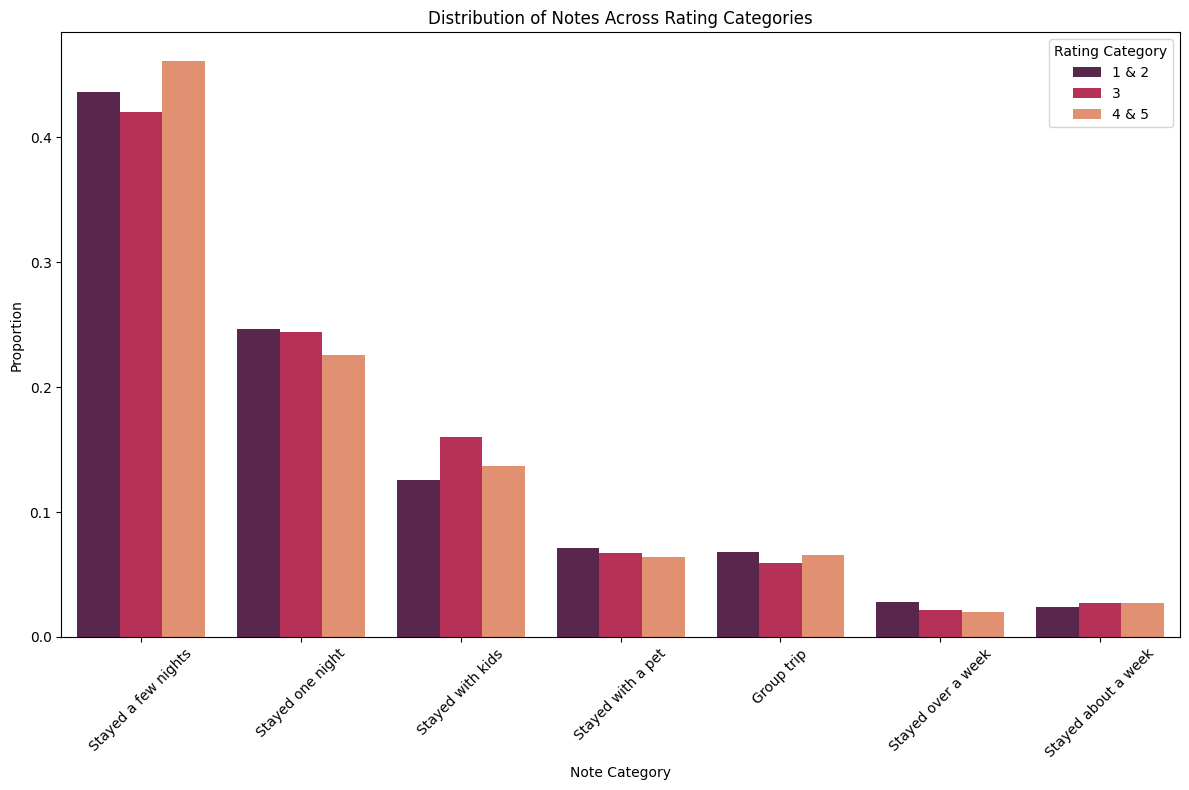

In [107]:
reviews_rating_2 = df[df['rating'].isin([1.0,2.0])][['rating','note']]
reviews_rating_3 = df[df['rating'] == 3.0][['rating','note']]
reviews_rating_4_5 = df[df['rating'].isin([4.0, 5.0])][['rating','note']]

proportions_2 = reviews_rating_2['note'].value_counts(normalize=True).rename('proportion').reset_index()
proportions_3 = reviews_rating_3['note'].value_counts(normalize=True).rename('proportion').reset_index()
proportions_4_5 = reviews_rating_4_5['note'].value_counts(normalize=True).rename('proportion').reset_index()

# Combine proportions into one DataFrame
combined_proportions = pd.concat([
    proportions_2.assign(rating='1 & 2'),
    proportions_3.assign(rating='3'),
    proportions_4_5.assign(rating='4 & 5')
], ignore_index=True)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='note', y='proportion', hue='rating', data=combined_proportions, palette='rocket')

# Customize plot
plt.xticks(rotation=45)
plt.title('Distribution of Notes Across Rating Categories')
plt.xlabel('Note Category')
plt.ylabel('Proportion')
plt.legend(title='Rating Category')

# Show plot
plt.tight_layout()
plt.show()

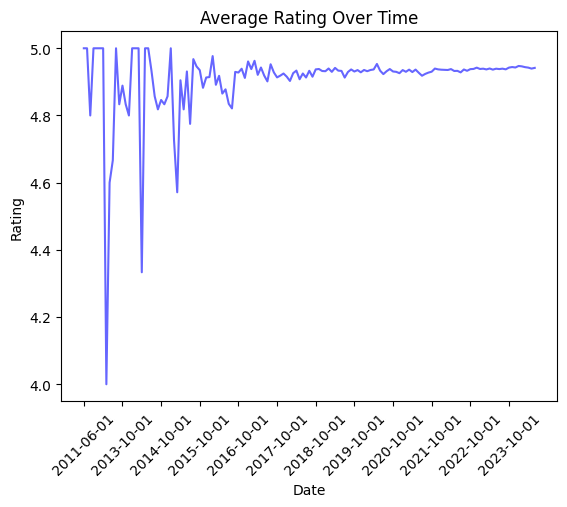

In [136]:
date_rate_avg = df.groupby('date')['rating'].mean().to_frame().reset_index()

ax = sns.lineplot(x = 'date', y = 'rating', data = date_rate_avg, alpha = 0.6, color='blue')

ticks = ax.get_xticks()
selected_ticks = ticks[::12]
ax.set_xticks(selected_ticks)

plt.xticks(rotation=45)
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

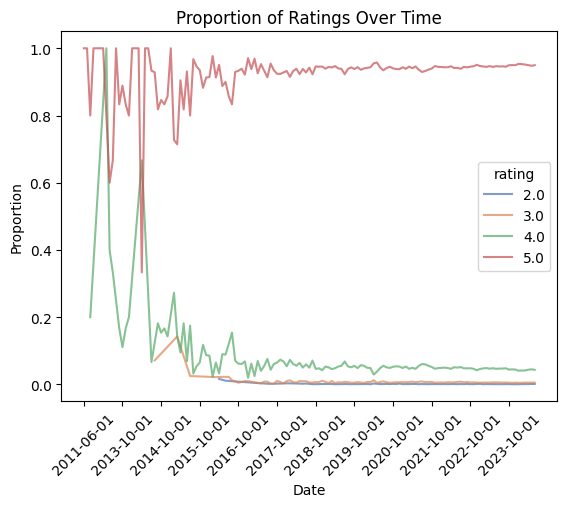

In [129]:
date_rate = df.groupby('date')['rating'].value_counts(normalize=True).to_frame().reset_index()

ax = sns.lineplot(x = 'date', y = 'proportion', hue = 'rating', data = date_rate, alpha = 0.7, palette= 'deep')

ticks = ax.get_xticks()
selected_ticks = ticks[::12]
ax.set_xticks(selected_ticks)

plt.xticks(rotation=45)
plt.title('Proportion of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

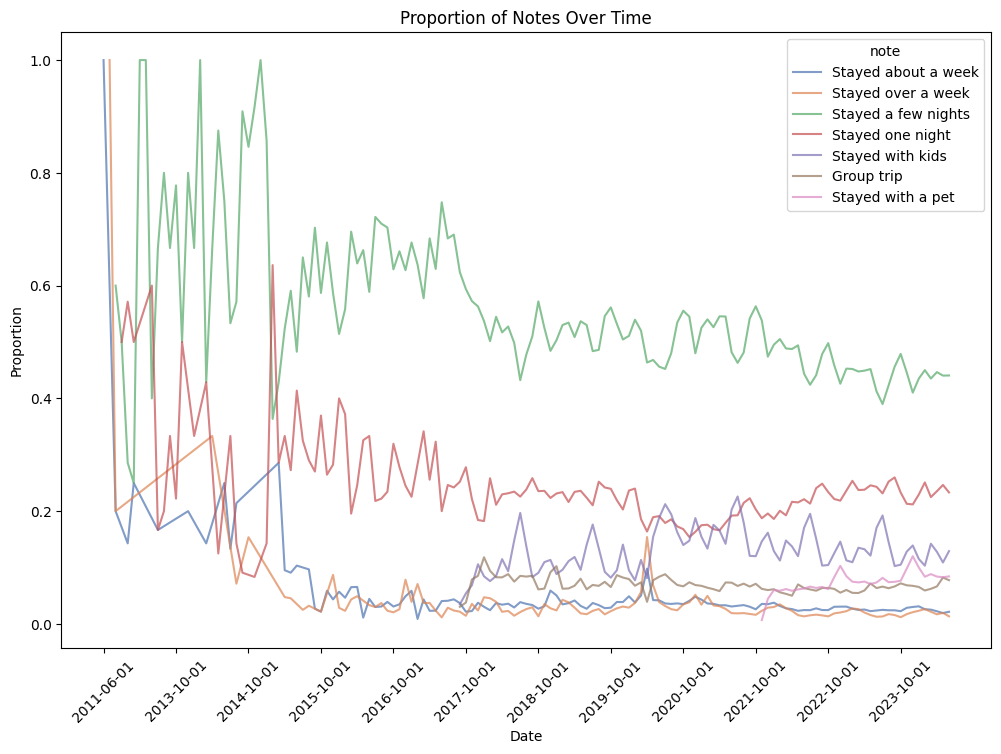

In [134]:
date_note = df.groupby('date')['note'].value_counts(normalize=True).to_frame().reset_index()

ax = sns.lineplot(x = 'date', y = 'proportion', hue = 'note', data = date_note, alpha = 0.7, palette= 'deep')
ax.figure.set_size_inches(12, 8)

ticks = ax.get_xticks()
selected_ticks = ticks[::12]
ax.set_xticks(selected_ticks)

plt.xticks(rotation=45)
plt.title('Proportion of Notes Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()